# Assignment 5

This assignment has weighting $1.5$.

# Model tuning and evaluation

In [17]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Dataset

We will use the Wisconsin breast cancer dataset for the following questions

In [18]:
import pandas as pd

wdbc_source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
#wdbc_source = '../datasets/wdbc/wdbc.data'

df = pd.read_csv(wdbc_source, header=None)

In [19]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [20]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
%matplotlib inline

# K-fold validation (20 points)

Someone wrote the code below to conduct cross validation.
Do you see anything wrong with it?
And if so, correct the code and provide an explanation.

In [22]:
import numpy as np
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import StratifiedKFold
else:
    from sklearn.model_selection import StratifiedKFold

scl = StandardScaler()
pca = PCA(n_components=2)
clf = Perceptron(random_state=1)

# data preprocessing
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# compute the data indices for each fold
if Version(sklearn_version) < '0.18':
    kfold = StratifiedKFold(y=y_train, 
                            n_folds=10,
                            random_state=1)
else:
    kfold = StratifiedKFold(n_splits=10,
                            random_state=1).split(X_train, y_train)

num_epochs = 2
scores = []

enumerate_kfold = list(enumerate(kfold))
for epoch in range(num_epochs):
    for k, (train, test) in enumerate_kfold:
        clf.partial_fit(X_train_std[train], y_train[train], classes=np.unique(y_train))
        score = clf.score(X_train_std[test], y_train[test])
        scores.append(score)
        print('Epoch: %s, Fold: %s, Class dist.: %s, Acc: %.3f' % (epoch,
                                                                   k, 
                                                                   np.bincount(y_train[train]),
                                                                   score))
    print('')
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Epoch: 0, Fold: 0, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 1, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 2, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 3, Class dist.: [256 153], Acc: 0.935
Epoch: 0, Fold: 4, Class dist.: [256 153], Acc: 1.000
Epoch: 0, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 0, Fold: 6, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 7, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 8, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 9, Class dist.: [257 153], Acc: 0.978

Epoch: 1, Fold: 0, Class dist.: [256 153], Acc: 0.957
Epoch: 1, Fold: 1, Class dist.: [256 153], Acc: 1.000
Epoch: 1, Fold: 2, Class dist.: [256 153], Acc: 0.935
Epoch: 1, Fold: 3, Class dist.: [256 153], Acc: 0.978
Epoch: 1, Fold: 4, Class dist.: [256 153], Acc: 1.000
Epoch: 1, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 1, Fold: 6, Class dist.: [257 153], Acc: 0.978
Epoch: 1, Fold: 7, Class dist.: [257 153], Acc: 0.978
Epoch: 1, Fold: 8, Class di

## Answer


In [23]:
import numpy as np
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

scl = StandardScaler()
pca = PCA(n_components=2)
clf = Perceptron(random_state=1)

# data preprocessing
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train_pca, y_train)

num_epochs = 2
scores = []

enumerate_kfold = list(enumerate(kfold))
for epoch in range(num_epochs):
    for k, (train, test) in enumerate_kfold:
        clf.fit(X_train_pca[train], y_train[train])
        score = clf.score(X_train_pca[test], y_train[test])       
        scores.append(score)
        print('Epoch: %s, Fold: %s, Class dist.: %s, Acc: %.3f' % (epoch,
                                                                   k, 
                                                                   np.bincount(y_train[train]),
                                                                   score))
    print('')

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Epoch: 0, Fold: 0, Class dist.: [256 153], Acc: 0.804
Epoch: 0, Fold: 1, Class dist.: [256 153], Acc: 0.674
Epoch: 0, Fold: 2, Class dist.: [256 153], Acc: 0.739
Epoch: 0, Fold: 3, Class dist.: [256 153], Acc: 0.826
Epoch: 0, Fold: 4, Class dist.: [256 153], Acc: 0.870
Epoch: 0, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 0, Fold: 6, Class dist.: [257 153], Acc: 0.933
Epoch: 0, Fold: 7, Class dist.: [257 153], Acc: 0.956
Epoch: 0, Fold: 8, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 9, Class dist.: [257 153], Acc: 0.978

Epoch: 1, Fold: 0, Class dist.: [256 153], Acc: 0.804
Epoch: 1, Fold: 1, Class dist.: [256 153], Acc: 0.674
Epoch: 1, Fold: 2, Class dist.: [256 153], Acc: 0.739
Epoch: 1, Fold: 3, Class dist.: [256 153], Acc: 0.826
Epoch: 1, Fold: 4, Class dist.: [256 153], Acc: 0.870
Epoch: 1, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 1, Fold: 6, Class dist.: [257 153], Acc: 0.933
Epoch: 1, Fold: 7, Class dist.: [257 153], Acc: 0.956
Epoch: 1, Fold: 8, Class di

1. The iterations should be independent to avoid cumulative learning. So should stick to fit() instead of partial_fit().
2. The perceptron deals with raw data instead of the data that has gone through the StandardScaler() and PCA(n_components=2)

# Precision-recall curve (40 points)

We have plotted ROC (receiver operator characteristics) curve for the breast cancer dataset.

Plot the precision-recall curve for the same data set using the same experimental setup.
What similarities and differences you can find between ROC and precision-recall curves?

You can find more information about precision-recall curve online such as: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

# Answer

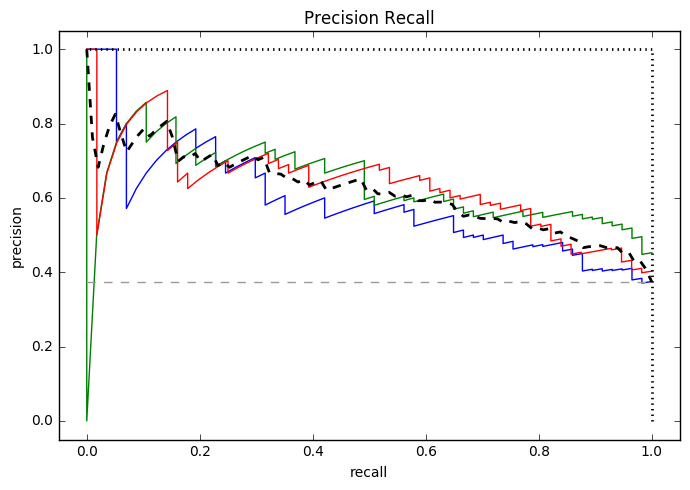

In [49]:
# your code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

X_train2 = X_train[:, [4, 14]]
X_test2 = X_test[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3,random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_precision = 0.0
mean_recall = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    
    precision, recall, thresholds = precision_recall_curve(y_train[test],
                                                  probas[:, 1],
                                                  pos_label=1)

    #mean_precision += interp(mean_recall, 1-recall, 1-precision)
    mean_precision += interp(-mean_recall, -recall, precision)
    precision_recall_auc = auc(recall, precision)

    plt.plot(recall,
             precision,
             lw=1,
             label='Precision_Recall fold %d (area = %0.2f)'
                   % (i+1, precision_recall_auc))
plt.plot([0, 1],
         [np.bincount(y_train)[1]/sum(np.bincount(y_train)), np.bincount(y_train)[1]/sum(np.bincount(y_train))],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_precision /= len(cv)
mean_precision[0] = 1.0
mean_precision[-1] =np.bincount(y_train)[1]/sum(np.bincount(y_train))
mean_auc = auc(mean_recall, mean_precision)

plt.plot(mean_recall, mean_precision, 'k--',
         label='mean PR (area = %0.2f)' % mean_auc, lw=2)

plt.plot([1, 1, 0],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall')
#plt.legend(loc="lower center")

plt.tight_layout()
plt.show()

your explanation

 Similarities: The patterns of ROC and precision-recall curves are both zigzag.
 
 Differences: ROC curve changes in one direction, while for precision-recall, the change is up and down.Overall, ROC curve shows a increasing trend while precision-recall curve shows a decreasing trend.

# Ensemble learning

We have used the following code to compute and plot the ensemble error from individual classifiers for binary classification:

In [25]:
from scipy.misc import comb
import math
import numpy as np

def ensemble_error(num_classifier, base_error):
    k_start = math.ceil(num_classifier/2)
    probs = [comb(num_classifier, k)*(base_error**k)*((1-base_error)**(num_classifier-k)) for k in range(k_start, num_classifier+1)]
    return sum(probs)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def plot_base_error(ensemble_error_func, num_classifier, error_delta):

    error_range = np.arange(0.0, 1+error_delta, error_delta)
    ensemble_errors = [ensemble_error_func(num_classifier=num_classifier, base_error=error) for error in error_range]

    plt.plot(error_range, ensemble_errors, 
             label = 'ensemble error',
             linewidth=2)
    plt.plot(error_range, error_range,
             label = 'base error',
             linestyle = '--',
             linewidth=2)
    plt.xlabel('base error')
    plt.ylabel('base/ensemble error')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [28]:
num_classifier = 11
error_delta = 0.01
base_error = 0.25

In [29]:

print(ensemble_error(num_classifier=num_classifier, base_error=base_error))


0.034327507019


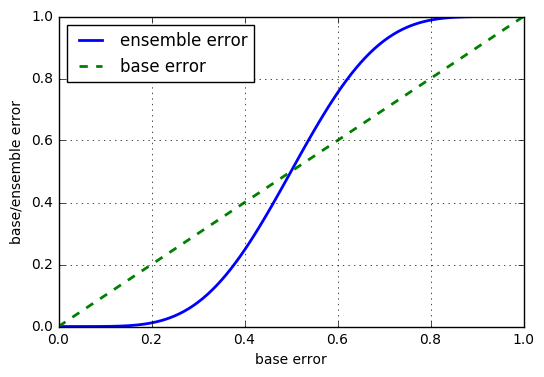

In [30]:
plot_base_error(ensemble_error, num_classifier=num_classifier, error_delta=error_delta)

# Number of classifiers (40 points)

The function plot_base_error() above plots the ensemble error as a function of the base error given a fixed number of classifiers.

Write another function to plot ensembe error versus different number of classifiers with a given base error.

Does the ensemble error always go down with more classifiers? 
Why or why not?

Can you improve the method ensemble_error() to produce a more reasonable plot?

## Answer

The code for plotting is below:

In [31]:
def plot_num_classifier(ensemble_error_func, max_num_classifier, base_error):
    # your code here
    clf_range = np.arange(1, 1+max_num_classifier, 1)
    ensemble_errors = [ensemble_error_func(num_classifier=num, base_error=base_error) for num in clf_range]
    base_errors = [base_error for num in clf_range]
    plt.plot(clf_range, ensemble_errors, 
             label = 'ensemble error',
             linewidth=2)
    plt.plot(clf_range, base_errors,
             label = 'base error',
             linestyle = '--',
             linewidth=2)
    plt.xlabel('num_classifier')
    plt.ylabel('base/ensemble error')
    plt.ylim([0.0, 0.5])
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    pass

State your observations of the experiments of your code...

In [32]:
max_num_classifiers = 20
base_error = 0.25

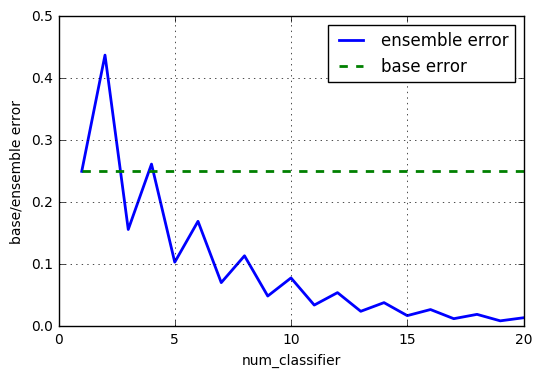

In [33]:
plot_num_classifier(ensemble_error, 
                    max_num_classifier=max_num_classifiers, 
                    base_error=base_error)

Explain your observations above.

Describe a better algorithm for computing the ensemble error.

The ensemble error doesn't always go down with more classifiers. For 2k-1, 2k classifiers, they share the same k_start = k. However, 2k classifiers seem have a higher ensemble error. With the increase of classifier, the ensemble has a decreasing trend.

In [34]:
def better_ensemble_error(num_classifier, base_error):
    num_classifiers = num_classifier
    if num_classifier>0:
        if ensemble_error(num_classifier, base_error) > ensemble_error(num_classifier-1, base_error):
            num_classifiers = num_classifiers - 1
    
    return ensemble_error(num_classifiers, base_error)

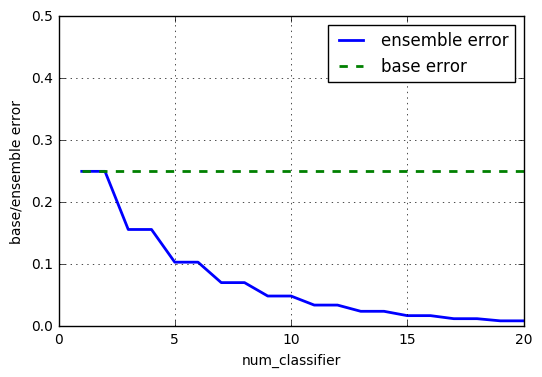

In [35]:
plot_num_classifier(better_ensemble_error, 
                    max_num_classifier=max_num_classifiers, 
                    base_error=base_error)